In [82]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.api import Holt

In [83]:
time = pd.read_csv("C:\Aalesh and Mandar\Datasets\monthly-milk-production-pounds-p.csv")

In [84]:
time.head()

,Month,Milk
0,1962-01,589
1,1962-02,561
2,1962-03,640
3,1962-04,656
4,1962-05,727


## Original Data

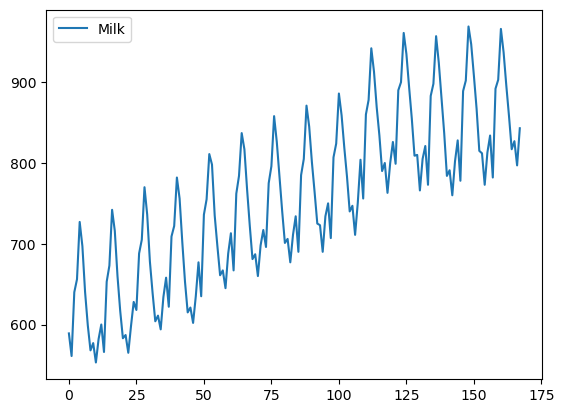

In [85]:
time.plot()
plt.show()

## Decomposition

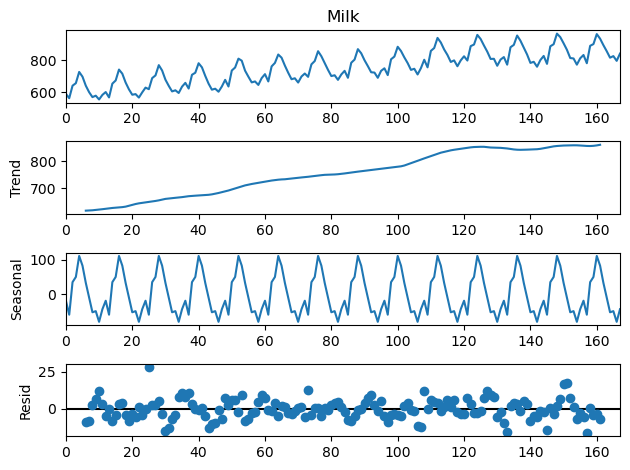

In [86]:
result = seasonal_decompose(time["Milk"], model = "additive", period = 12)
result.plot()
plt.show()

## Train_test original Data

In [87]:
y = time["Milk"]
y_train = time["Milk"][:-12]
y_test = time["Milk"][-12:]

In [112]:
y_train

0      589
1      561
2      640
3      656
4      727
      ... 
151    867
152    815
153    812
154    773
155    813
Name: Milk, Length: 156, dtype: int64

In [113]:
y_test

156    834
157    782
158    892
159    903
160    966
161    937
162    896
163    858
164    817
165    827
166    797
167    843
Name: Milk, dtype: int64

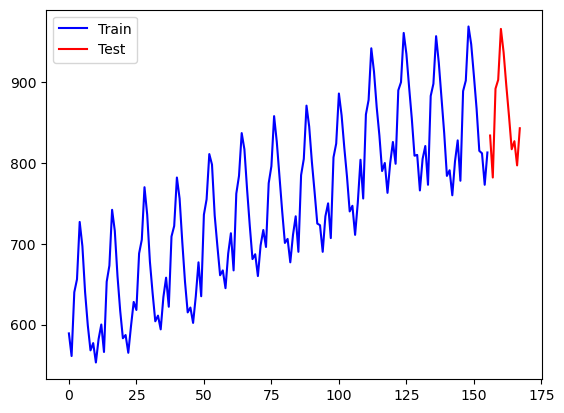

In [88]:
plt.plot(y_train, color="blue", label="Train")
plt.plot(y_test, color="red", label="Test")
plt.legend(loc="best")
plt.show()

## Central Moving Average

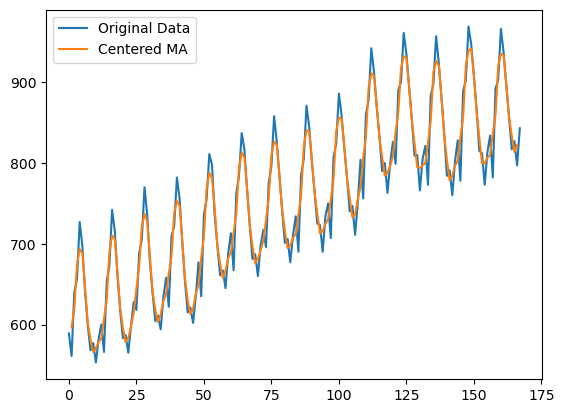

In [89]:
fcast = y.rolling(3, center=True).mean()
plt.plot(y, label = 'Original Data')
plt.plot(fcast, label = 'Centered MA')
plt.legend(loc='best')
plt.show()

## Trailing MA

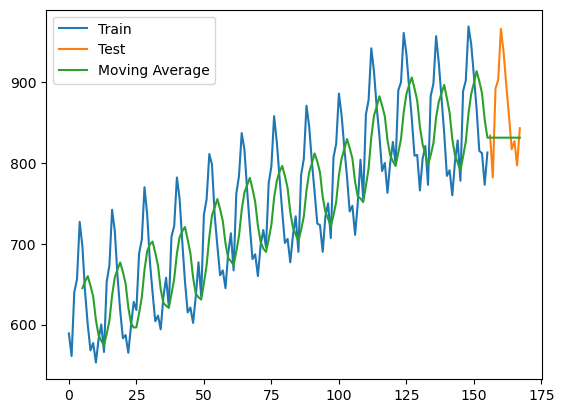

In [90]:
fcast = y_train.rolling(6).mean()
last_val = fcast.iloc[-1]
MA_series = pd.Series(last_val.repeat(len(y_test)))
MA_fcast = pd.concat([fcast, MA_series], ignore_index = True)
plt.plot(y_train, label = 'Train')
plt.plot(y_test, label = 'Test')
plt.plot(MA_fcast, label = 'Moving Average')
plt.legend(loc='best')
plt.show()

In [91]:
rmse = np.sqrt(mean_squared_error(y_test, MA_series))
print("RMSE = ", rmse)

RMSE =  62.57661970203673


## Simple Exponential Smoothing

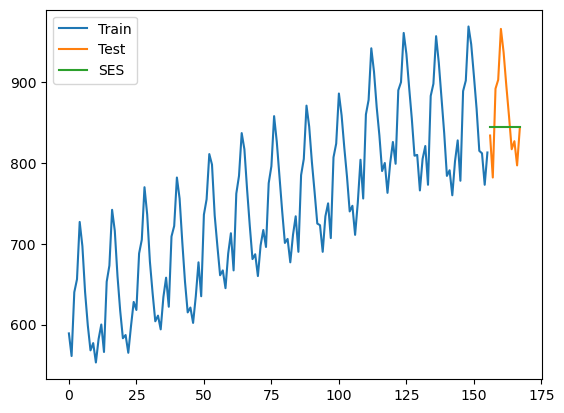

In [92]:
alpha = 0.1
fit1 = SimpleExpSmoothing(y_train).fit(smoothing_level = alpha)
fcast1 = fit1.forecast(len(y_test))
plt.plot(y_train, label = 'Train')
plt.plot(y_test, label = 'Test')
plt.plot(fcast1, label = 'SES')
plt.legend(loc='best')
plt.show()

In [93]:
rmse = np.sqrt(mean_squared_error(y_test, fcast1))
print("RMSE = ", rmse)

RMSE =  57.02407689025325


## Holt's Linear Trend

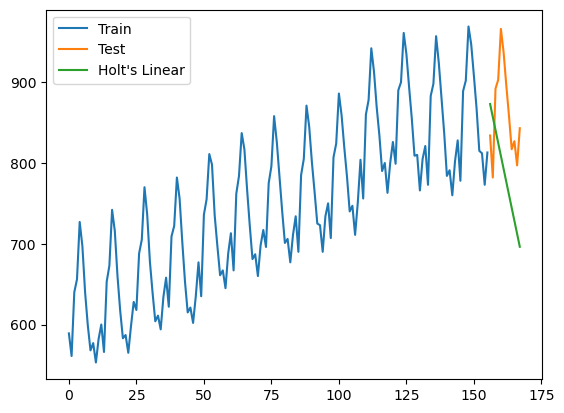

In [96]:
alpha = 0.1
beta = 0.9
fit2 = Holt(y_train).fit(smoothing_level=alpha, smoothing_trend = beta)
fcast2 = fit2.forecast(len(y_test))
plt.plot(y_train, label = 'Train')
plt.plot(y_test, label = 'Test')
plt.plot(fcast2, label = "Holt's Linear")
plt.legend(loc='best')
plt.show()

In [97]:
rmse = np.sqrt(mean_squared_error(y_test, fcast2))
print("RMSE = ", rmse)

RMSE =  103.61840119176892


## Exponential 

C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


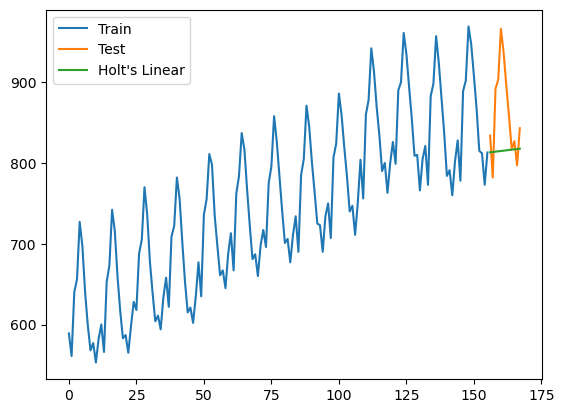

In [100]:
alpha = 0.1
beta = 0.9
fit2 = Holt(y_train, exponential = True).fit()
fcast2 = fit2.forecast(len(y_test))
plt.plot(y_train, label = 'Train')
plt.plot(y_test, label = 'Test')
plt.plot(fcast2, label = "Holt's Exponential")
plt.legend(loc='best')
plt.show()

In [101]:
rmse = np.sqrt(mean_squared_error(y_test, fcast2))
print("RMSE = ", rmse)

RMSE =  72.11575517944583


## Additive Trend

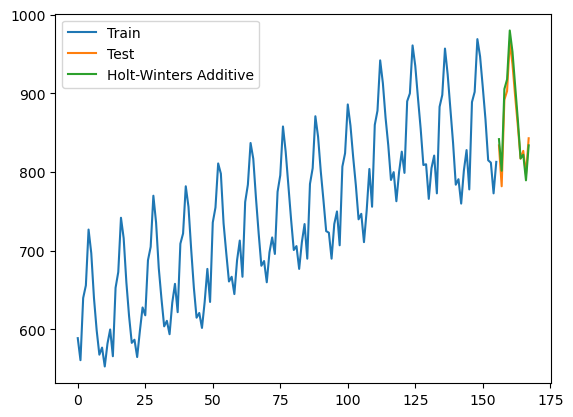

In [105]:
alpha = 0.1
beta = 0.9
phi = 0.2
fit3 = ExponentialSmoothing(y_train, seasonal_periods = 12, trend ="add", seasonal="add").fit()
fcast3 = fit3.forecast(len(y_test))
plt.plot(y_train, label = 'Train')
plt.plot(y_test, label = 'Test')
plt.plot(fcast3, label = "Holt-Winters Additive")
plt.legend(loc='best')
plt.show()

In [104]:
rmse = np.sqrt(mean_squared_error(y_test, fcast3))
print("RMSE = ", rmse)

RMSE =  11.932665837714705


## Multiplicative Trend

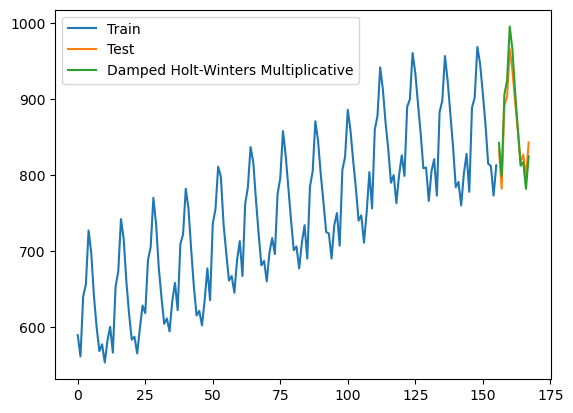

In [108]:
alpha = 0.1
beta = 0.9
phi = 0.2
fit3 = ExponentialSmoothing(y_train, seasonal_periods = 12, damped_trend = True, trend ="add", seasonal="mul").fit()
fcast3 = fit3.forecast(len(y_test))
plt.plot(y_train, label = 'Train')
plt.plot(y_test, label = 'Test')
plt.plot(fcast3, label = "Damped Holt-Winters Multiplicative")
plt.legend(loc='best')
plt.show()

In [109]:
rmse = np.sqrt(mean_squared_error(y_test, fcast3))
print("RMSE = ", rmse)

RMSE =  17.09919638835997
